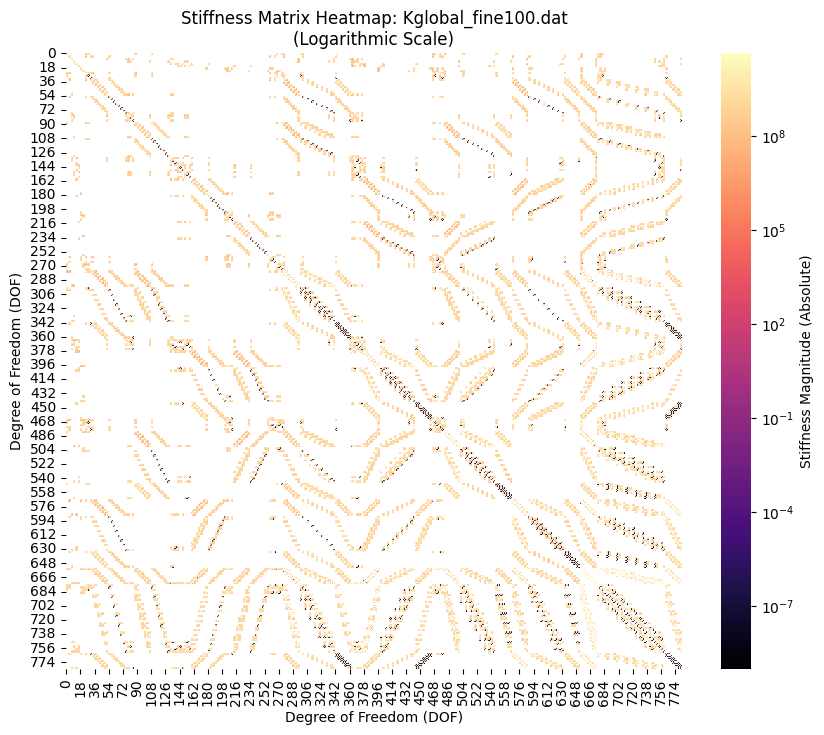

Heatmap generated for 783 DOFs.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For a high-quality heatmap
from matplotlib.colors import LogNorm # For better visibility of small values
from scipy.sparse import coo_matrix

# folder where Kglobal_*.dat lives
os.chdir(r"C:\Calculix\ccx_2.23_wsl\Stiffness matrices")

# Load triplets
filename = "Kglobal_fine100.dat"
data = np.loadtxt(filename)
i = data[:, 0].astype(int) - 1
j = data[:, 1].astype(int) - 1
v = data[:, 2]

ndof = int(max(i.max(), j.max()) + 1)
K_ut = coo_matrix((v, (i, j)), shape=(ndof, ndof)).tocsr()
K_sparse = K_ut + K_ut.T - coo_matrix((K_ut.diagonal(), (range(ndof), range(ndof))), shape=(ndof, ndof)).tocsr()

# Convert to dense for the heatmap
# Only do this if NDOF is reasonable (< 5000)
K_dense = K_sparse.toarray()

# We take the absolute value because stiffness entries can be negative
# but LogNorm requires positive values.
K_abs = np.abs(K_dense)

plt.figure(figsize=(10, 8))

# HEATMAP LOGIC
# We use LogNorm so we can see the coupling (blue) as well as the diagonal (red)
# cmap 'rocket' or 'magma' looks very 'FEA-professional'
sns.heatmap(K_abs,
            norm=LogNorm(vmin=K_abs[K_abs > 0].min(), vmax=K_abs.max()),
            cmap='magma',
            square=True,
            cbar_kws={'label': 'Stiffness Magnitude (Absolute)'})

plt.title(f"Stiffness Matrix Heatmap: {filename}\n(Logarithmic Scale)")
plt.xlabel("Degree of Freedom (DOF)")
plt.ylabel("Degree of Freedom (DOF)")

# Draw lines every 3 or 6 DOFs to visualize node boundaries
# (Assuming 3 DOFs per node for solids)
for b in range(0, ndof, 3):
    plt.axhline(b, color='white', lw=0.5, alpha=0.3)
    plt.axvline(b, color='white', lw=0.5, alpha=0.3)

plt.show()

print(f"Heatmap generated for {ndof} DOFs.")